In [2]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#-----------------Mätning1------------------------------------
Spänning1_1_file = r'./Mätningar/Ångström_1/Spänning1.csv'
Spänning1_2_file = r'./Mätningar/Ångström_1/Spänning2.csv'
Temperatur1_1_file = r'./Mätningar/Ångström_1/Temperatur1.csv'
Temperatur1_2_file = r'./Mätningar/Ångström_1/Temperatur2.csv'
#-----------------Mätning2------------------------------------
Spänning2_1_file = r'./Mätningar/Ångström_2/Spänning1.csv'
Spänning2_2_file = r'./Mätningar/Ångström_2/Spänning2.csv'
Temperatur2_1_file = r'./Mätningar/Ångström_2/Temperatur1.csv'
Temperatur2_2_file = r'./Mätningar/Ångström_2/Temperatur2.csv'
#-----------------Mätning2------------------------------------
Spänning3_1_file = r'./Mätningar/Ångström_3/Spänning1.csv'
Spänning3_2_file = r'./Mätningar/Ångström_3/Spänning2.csv'
Temperatur3_1_file = r'./Mätningar/Ångström_3/Temperatur1.csv'
Temperatur3_2_file = r'./Mätningar/Ångström_3/Temperatur2.csv'

In [75]:
class Data:

    def __init__(self, data, Mätintervall, Startindex):
        self.startind = Startindex
        self.datadict = {}
        self.datadict['Time'] = []
        self.datadict['Amplitude'] = []
        self.matint = Mätintervall
        with open(data, 'r', encoding='utf-8') as file:
            for row in file:
                if row[0].isnumeric():
                    r = row.split(';')
                    self.datadict['Time'].append(int(r[0])*Mätintervall)
                    self.datadict['Amplitude'].append(float('.'.join(r[1][:-1].split(','))))
        return
    def t(self):
        return self.datadict['Time'][self.startind:]
    
    def a(self):
        return self.datadict['Amplitude'][self.startind:]
    
    def get_freq(self):
        x, y = np.array(self.datadict['Time'][2500:]), np.array(self.datadict['Amplitude'][2500:])
        Freq_Amplitudes = np.abs(np.fft.fft(y))
        Freq = np.fft.fftfreq(len(x), x[1]-x[0])
        FFT = {}
        for i in range(len(Freq)):
            FFT[np.abs(Freq_Amplitudes[i])] = Freq[i]
        sorted_list = sorted(FFT.items(), key = lambda x:x[0])
        return FFT[sorted_list[-2][0]]
    
    def get_peaks(self):
        peakindice = find_peaks(self.a(), distance=int(0.95/self.get_freq()/self.matint))
        peaks = []
        for index in peakindice[0]:
            peaks.append((self.t()[index] ,self.a()[index]))
        return peaks


class Measurement:
    def __init__(self, data1, data2, Mätintervall):
        self.X1 = Data(data1, Mätintervall)
        self.X2 = Data(data2, Mätintervall)
    
    


In [77]:
Temperatur1_1 = Data(Temperatur1_1_file, 5, 2500)
#Temperatur1_2 = Data(Temperatur1_2_file, 5)
#Temperatur2_1 = Data(Temperatur2_1_file, 2)
#Temperatur2_2 = Data(Temperatur2_2_file, 2)
#Temperatur3_1 = Data(Temperatur2_1_file, 2)
#Temperatur3_2 = Data(Temperatur2_2_file, 2)

Temperatur1_1.get_peaks()

[(12915, 2.59372),
 (13515, 2.59469),
 (14115, 2.60377),
 (14715, 2.59698),
 (15315, 2.60051),
 (15920, 2.60081),
 (16515, 2.60647),
 (17120, 2.60951),
 (17715, 2.61575),
 (18315, 2.61406),
 (18910, 2.61801),
 (19515, 2.63401),
 (20115, 2.64441),
 (20715, 2.64668),
 (21315, 2.63677),
 (21920, 2.62263),
 (22515, 2.61968),
 (23115, 2.62346),
 (23720, 2.6258),
 (24315, 2.62754),
 (24915, 2.6332),
 (25515, 2.6369),
 (26115, 2.62356),
 (26720, 2.61799),
 (27315, 2.62389),
 (27915, 2.62724),
 (28520, 2.61942),
 (29115, 2.61519),
 (29720, 2.62275),
 (30315, 2.61972),
 (30915, 2.62193),
 (31520, 2.6327),
 (32115, 2.63067),
 (32720, 2.63575),
 (33315, 2.6394),
 (33915, 2.63362),
 (34520, 2.63779),
 (35120, 2.63869),
 (35720, 2.63821),
 (36315, 2.6529),
 (36915, 2.66038),
 (37515, 2.67014),
 (38120, 2.66186),
 (38720, 2.65396),
 (39315, 2.65018),
 (39915, 2.65325),
 (40515, 2.65295),
 (41120, 2.64492),
 (41715, 2.65511),
 (42320, 2.6641),
 (42920, 2.67094),
 (43515, 2.67545),
 (44120, 2.67951),


599.7101449275362


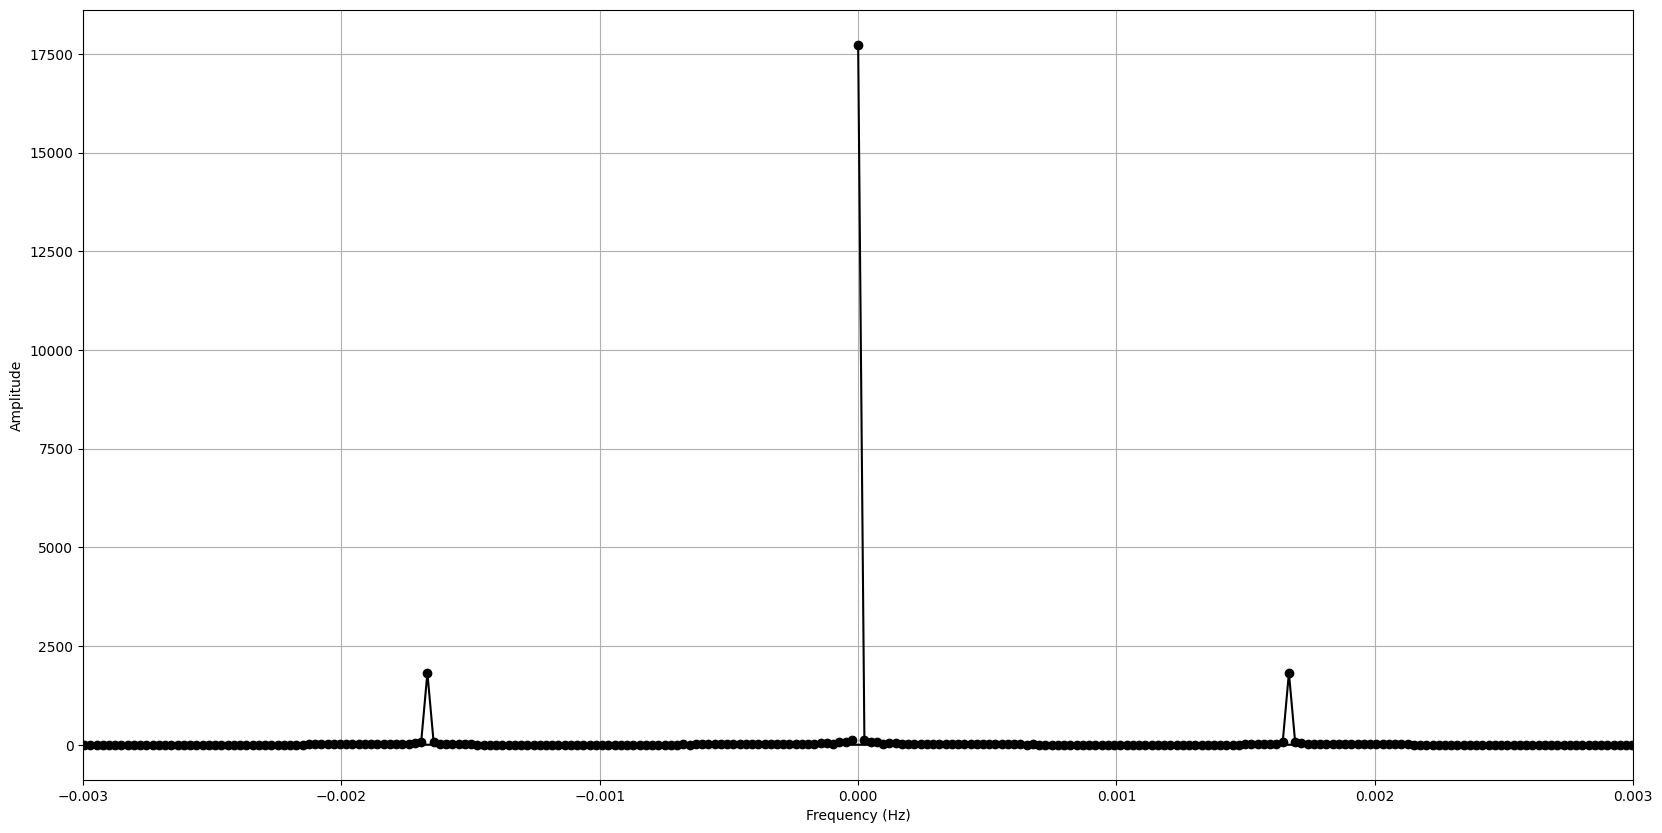

In [14]:
def Oscillation_Frequency(x, y):
    x, y = np.array(x), np.array(y)
    Freq_Amplitudes = np.abs(np.fft.fft(y))
    Freq = np.fft.fftfreq(len(x), x[1]-x[0])
    FFT = {}
    for i in range(len(Freq)):
        FFT[np.abs(Freq_Amplitudes[i])] = Freq[i]
    sorted_list = sorted(FFT.items(), key = lambda x:x[0])
    return Freq, Freq_Amplitudes, FFT[sorted_list[-2][0]]

Freq, Freq_Amplitudes, Frequency = Oscillation_Frequency(Temperatur1_1.t()[2500:], Temperatur1_1.a()[2500:])
print(1/Frequency)
plt.figure(figsize=(20, 10))
plt.plot(Freq, Freq_Amplitudes, 'ko-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([-0.003, 0.003])
plt.show()

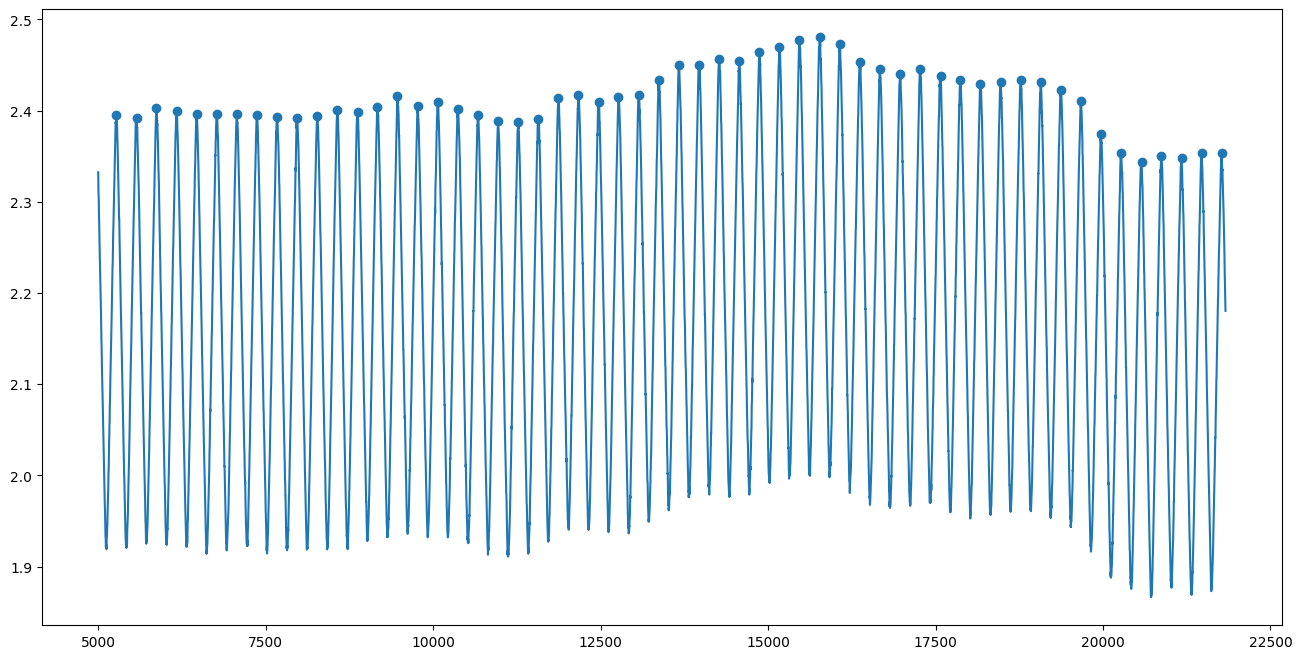

(array([ 135,  287,  434,  587,  734,  885, 1033, 1183, 1333, 1486, 1636,
        1785, 1936, 2083, 2232, 2384, 2533, 2685, 2834, 2985, 3136, 3283,
        3435, 3583, 3737, 3882, 4035, 4188, 4333, 4486, 4636, 4783, 4935,
        5085, 5233, 5386, 5534, 5686, 5836, 5984, 6135, 6288, 6433, 6585,
        6735, 6886, 7035, 7185, 7336, 7486, 7635, 7788, 7935, 8086, 8237,
        8385], dtype=int64),
 {})

In [61]:
from scipy.signal import find_peaks

peaks = find_peaks(Temperatur3_1.a()[2500:], distance=170/2)
ypeaks = np.array([])
for peak in peaks[0]:
    ypeaks = np.append(ypeaks, Temperatur3_1.a()[2500:][peak])

plt.figure(figsize=(16,8))
plt.plot(Temperatur3_1.t()[2500:], Temperatur3_1.a()[2500:])
plt.scatter(peaks[0]*2+2500*2, ypeaks)
plt.show()
peaks